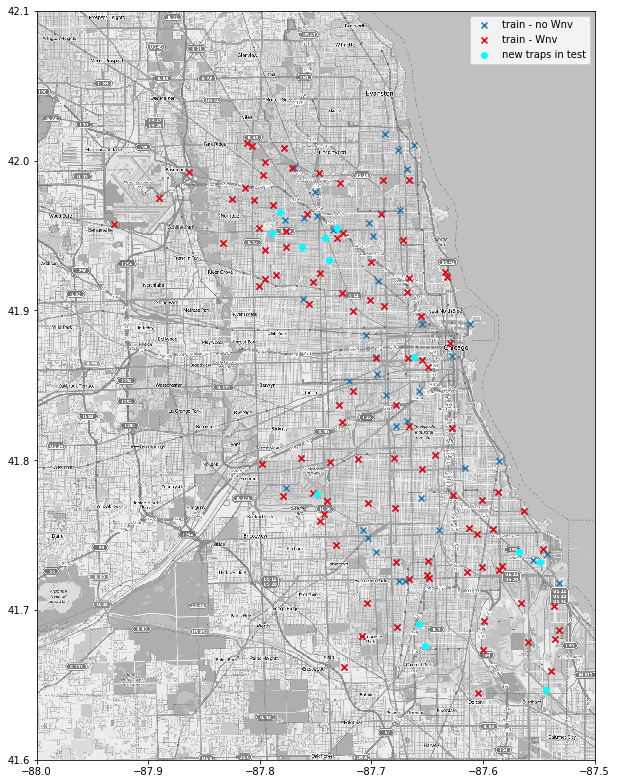

In [9]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")
train_traps = pd.read_csv('./assets/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
new_traps = pd.read_csv('./assets/new_latlong.csv')

# plot the map
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

# plot the traps
hot_traps = train_traps[train_traps.WnvPresent==1]
cold_traps = train_traps[train_traps.WnvPresent==0]

hot_traps = hot_traps[['Longitude', 'Latitude']].drop_duplicates().values
cold_traps = cold_traps[['Longitude', 'Latitude']].drop_duplicates().values
new_traps = new_traps[['Longitude', 'Latitude']].values

plt.scatter(cold_traps[:,0], cold_traps[:,1], marker='x', label='train - no Wnv');
plt.scatter(hot_traps[:,0], hot_traps[:,1], marker='x', color='red', label='train - Wnv');
plt.scatter(new_traps[:,0], new_traps[:,1], marker='o', color='cyan', label='new traps in test');
plt.legend();

plt.savefig('trap_map.png');